In [ ]:
# From sensio

In [1]:
import os
from pathlib import Path

path = Path("data")
os.listdir(path)

['train.csv',
 'asset_details.csv',
 'gresearch_crypto',
 'supplemental_train.csv',
 'example_sample_submission.csv',
 'example_test.csv']

In [2]:
import pandas as pd

train = pd.read_csv(path / "train.csv")
train = train.sort_values(by=["timestamp", "Asset_ID"])
train.index = pd.to_datetime(train["timestamp"], unit="s")
train_clean = train.groupby("Asset_ID").ffill().bfill()
train_clean["Asset_ID"] = train["Asset_ID"].values.copy()

train_clean

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_ID
timestamp,,,,,,,,,,
2018-01-01 00:01:00,1514764860,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399,0
2018-01-01 00:01:00,1514764860,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643,1
2018-01-01 00:01:00,1514764860,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218,2
2018-01-01 00:01:00,1514764860,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922,5
2018-01-01 00:01:00,1514764860,173.0,738.302500,746.000000,732.510000,738.507500,3.359879e+02,738.839291,-0.004809,6
...,...,...,...,...,...,...,...,...,...,...
2021-09-21 00:00:00,1632182400,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,-0.001154,9
2021-09-21 00:00:00,1632182400,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,0.009831,10
2021-09-21 00:00:00,1632182400,48.0,232.695000,232.800000,232.240000,232.275000,1.035123e+02,232.569697,0.002568,11


<AxesSubplot:xlabel='timestamp'>

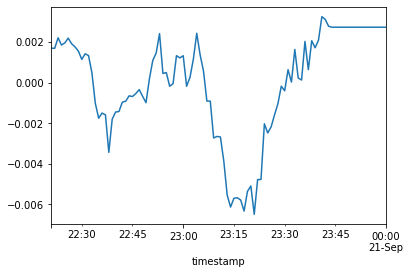

In [3]:
train_clean[train_clean["Asset_ID"] == 1][-100:].Target.plot()

In [1]:
train_clean.isna().sum()

NameError: name 'train_clean' is not defined

In [ ]:
kk = train_clean[train_clean["Asset_ID"] == 1][-5:]

kk

In [ ]:
kk.rresample('1Min').mean()